### Predicting Bike Rentals

** Based on a dataset downloaded from a kaggle competition. For more information, follow this link: ** https://www.kaggle.com/c/bike-sharing-demand

** The problem: **
*"You are provided hourly rental data spanning two years. For this competition, the training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period."*

** Data Fields:**

datetime - hourly date + timestamp

season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

train = pd.read_csv("train.csv")

train.head(10)


              datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1   9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1   9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1   9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1   9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1   9.84  14.395   
5  2011-01-01 05:00:00       1        0           0        2   9.84  12.880   
6  2011-01-01 06:00:00       1        0           0        1   9.02  13.635   
7  2011-01-01 07:00:00       1        0           0        1   8.20  12.880   
8  2011-01-01 08:00:00       1        0           0        1   9.84  14.395   
9  2011-01-01 09:00:00       1        0           0        1  13.12  17.425   

   humidity  windspeed  casual  registered  count  
0        81     0.0000       3          13     16  
1        80     0.0000    

In [2]:
train.describe()

             season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.96047

** All the fields have 10886 rows.** No missing values (nulls, NAs).

Now, let's separate date from time in the the 'datetime' column:

In [3]:
temp = pd.DatetimeIndex(train['datetime'])
train['Date'] = temp.date
train['Time'] = str(temp.time)
train.drop('datetime', axis=1, inplace=True)
train.head()

   season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   
2       1        0           0        1  9.02  13.635        80        0.0   
3       1        0           0        1  9.84  14.395        75        0.0   
4       1        0           0        1  9.84  14.395        75        0.0   

   casual  registered  count        Date      Time  
0       3          13     16  2011-01-01  00:00:00  
1       8          32     40  2011-01-01  01:00:00  
2       5          27     32  2011-01-01  02:00:00  
3       3          10     13  2011-01-01  03:00:00  
4       0           1      1  2011-01-01  04:00:00  

We are interested in predicting the 'count' column, which is the total number of rentals no matter they are from casual users or registered ones. So we are going to drop 'casual' and 'registered' columns from the dataframe.

In [4]:
train.drop(['casual','registered'], axis=1, inplace=True)

train.describe()

             season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed         count  
count  10886.000000  10886.000000  10886.000000  10886.000000  
mean      23.655084     61.886460     12.799395    191.574132  
std        8.474601     19.245033      8.164537    181.144454  
min        0.760000      0.000000      0.

Since the variable we want to predict is continuous, this is a regression problem. Thus, we can apply linear regression, regression trees, and ensembled methods such as random forest and xgboost (the favorite one in kaggle competitions). We could start applying them right away, however it is better to take some time in analyzing and exploring the dataset to gain some interesting insights about the context.

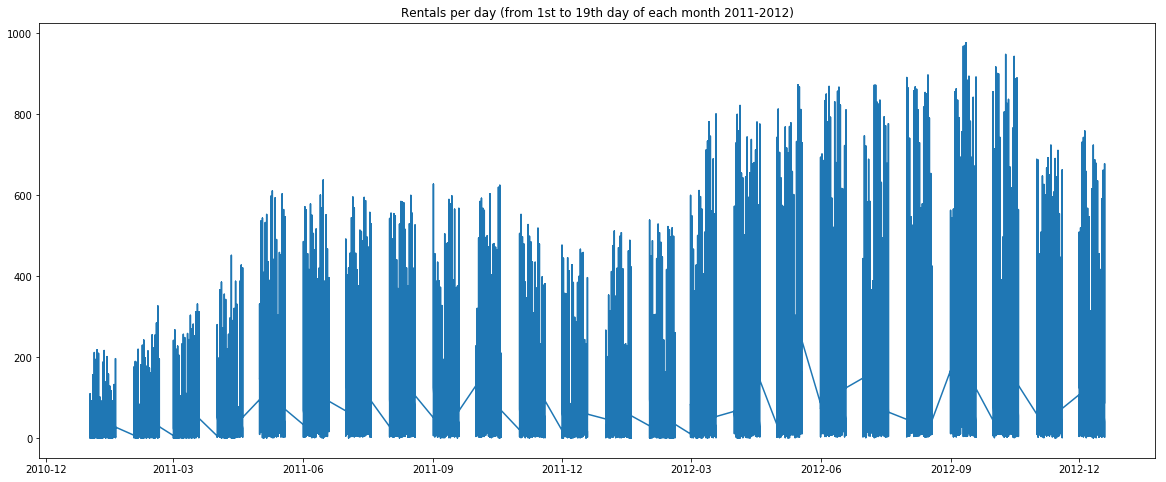

In [5]:
plt.figure(figsize=(20,8))
plt.title("Rentals per day (from 1st to 19th day of each month 2011-2012)")
plt.plot(train["Date"], train["count"])
plt.show()

The gaps between each pair of 'bars' is just because the training data includes only the first 19 days of each month. I know this is not a barplot, but looks like just because the last 11 days were extracted to build the test data.

Another important observation is that:
 * The rentals increased in 2012.
 * There are more rentals in warmer months (from May to October).

ValueError: x and y must have same first dimension, but have shapes (1,) and (10886,)

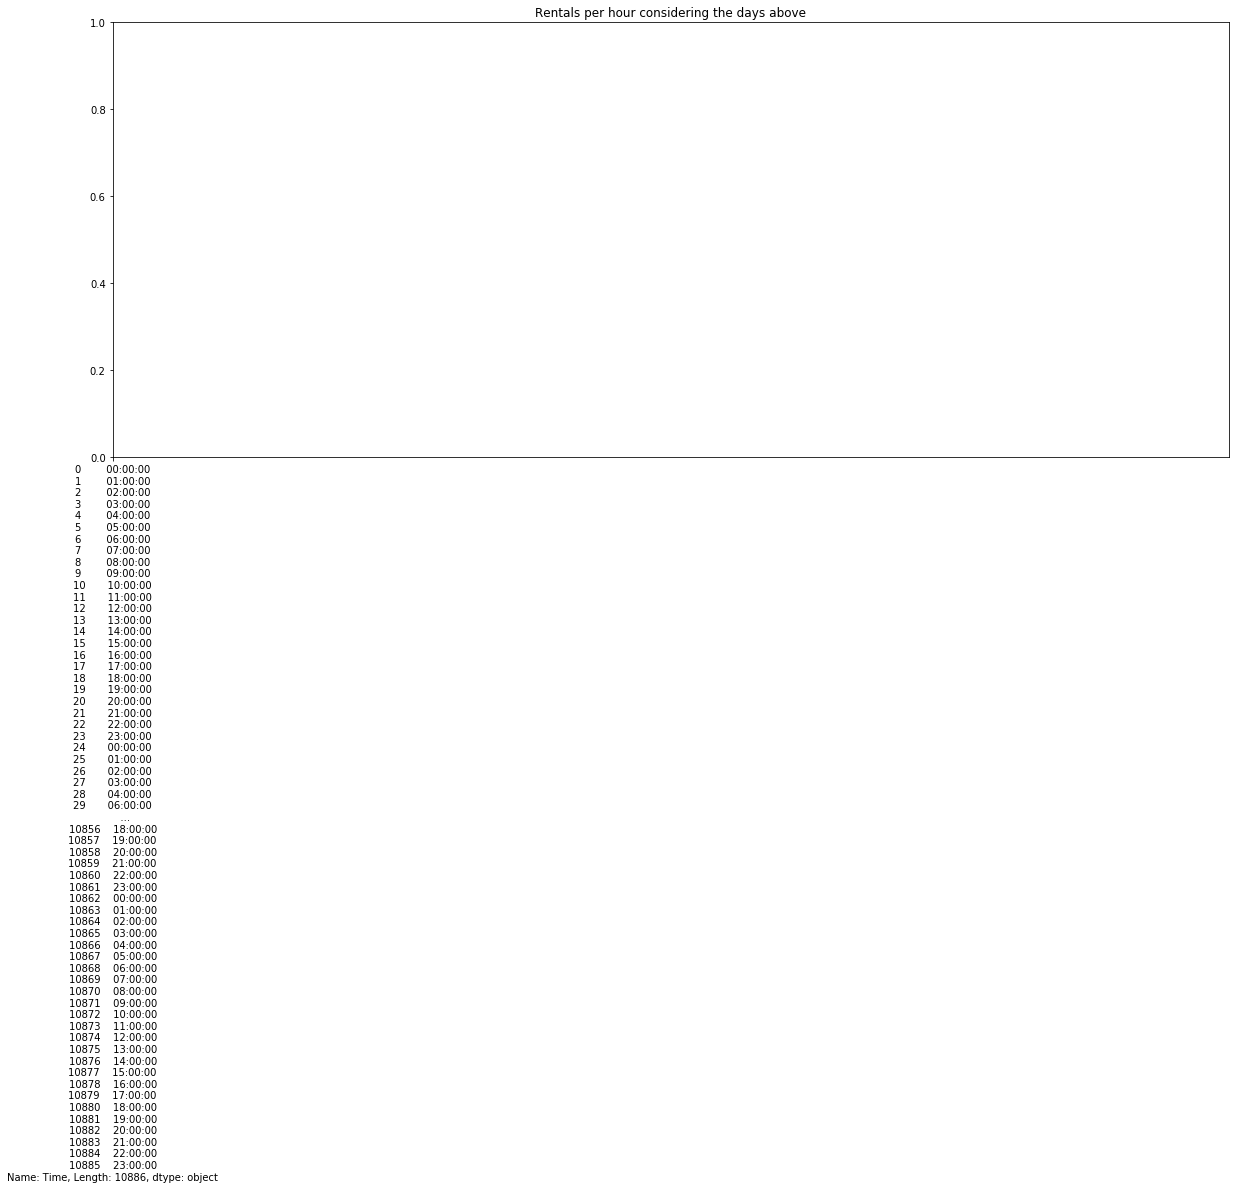

ValueError: x and y must have same first dimension, but have shapes (1,) and (10886,)

In [7]:
plt.figure(figsize=(20,8))
plt.title("Rentals per hour considering the days above")
plt.plot(train["Time"], train["count"])
plt.show()

We can note that there are more rentals in the rush hours: they increase a lot in the early morning, and then decrease after 8am. Then, there's a reasonable demand from 10am and 2pm. Finally, there's a high peak of rentals from around 4pm to 7pm.

** So, it is clear with simple visualization (and follows our intution) that date and time are good predictors for bike rentals. **

Now, let's check some insigh: does the higher demand durint rush hours explain that the bikes are rent for commuting to/from work?
  * To answer this question we need to group the rentals per 'workday' conlumn.

Another issue worth analyzing:
    * rentals per weather conditions
    * rentals in holidays (when most of the people are not supposed to commut)
    * humidity and windspeed are good predictors?
    * temp and atemp are supposed to be linearly correlated. check this multiple co-linearity and maybe drop one of them.